In [2]:
import numpy as np
import warnings
warnings.filterwarnings('ignore')

import os
import json

from model_utils import *
from client import Client

def setup_clients(dataset, model=None, use_val_set=False):
    eval_set = 'test' if not use_val_set else 'val'
    train_data_dir = os.path.join('data', dataset, 'data', 'train')
    test_data_dir = os.path.join('data', dataset, 'data', eval_set)

    users, groups, train_data, test_data = read_data(train_data_dir, test_data_dir)
    if len(groups) == 0:
        groups = [[] for _ in users]    
    clients = [Client(u, g, train_data[u], test_data[u], model) for u, g in zip(users, groups)]

    return clients, train_data, test_data



clients, train_data, test_data = setup_clients("celeba")

lens = [x.num_train_samples for x in clients]

In [19]:
from fastai.vision import *
from fastai.metrics import error_rate

given_client = clients[0]
x = given_client.train_data['x']
y = given_client.train_data['y']
y = [round(i) for i in y]

tfms = get_transforms(do_flip=False)
path_img = os.path.join("data", "celeba", "data", "raw", "img_align_celeba")
abs_path = os.path.abspath(path_img)
df = pd.DataFrame(zip(x, y), columns=["path", "label"])
data = ImageDataBunch.from_df(abs_path, df, ds_tfms=get_transforms(), size=84, bs=16)
data.show_batch(rows=5, figsize=(5,5))

You can deactivate this warning by passing `no_check=True`.


StopIteration: 

In [1]:
from fastai.vision import *
from fastai.metrics import error_rate

tfms = get_transforms(do_flip=False)
labels_ls = [x for x in clients[0].train_data['y']]

path_img = os.path.join("data", "celeba", "data", "raw", "img_align_celeba")
print(path_img)
abs_path = os.path.abspath(path_img)
print(abs_path)

ModuleNotFoundError: No module named 'fastai'

In [80]:
import pandas as pd

def show_devimg(seq_id):
    given_client = clients[seq_id]
    x = given_client.train_data['x']
    y = given_client.train_data['y']
    y = [round(i) for i in y]

    df = pd.DataFrame(zip(x, y), columns=["path", "label"])
    data = ImageDataBunch.from_df(abs_path, df, ds_tfms=get_transforms(), size=84, bs=9)
    data.show_batch(rows=3, figsize=(7,6))


In [ ]:

import random

target = [random.randint(0,1) for i in range(10)]


client:5826


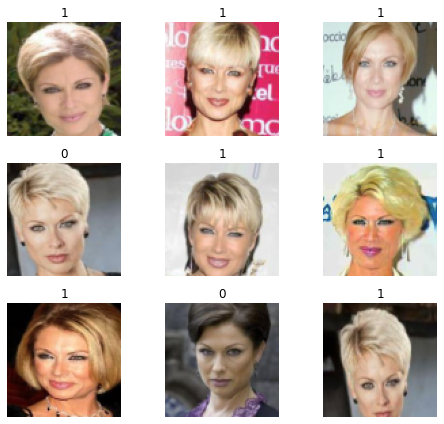

In [85]:
lis = [i.id for i in clients]
rnd_client = random.choice(lis)

obj_dic = {}
for idx, client in enumerate(clients):
    obj_dic[client.id] = idx
    
print("client:{}".format(rnd_client))
show_devimg(obj_dic[str(rnd_client)])

client:6715


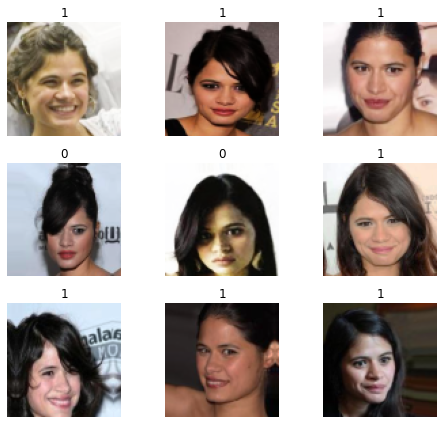

In [87]:
rnd_client = random.choice(lis)
print("client:{}".format(rnd_client))
show_devimg(obj_dic[str(rnd_client)])

In [22]:
import pandas as pd

df = pd.read_json("../all_in_one/ensemble/c.json")

In [23]:
cid_dict = {}

for idx, cid in enumerate(df['id']):
    cid_dict[cid] = idx
    
print(cid_dict)

{10: 0, 100: 1, 10004: 2, 10024: 3, 10068: 4, 10071: 5, 10073: 6, 10082: 7, 10084: 8, 10105: 9, 10113: 10, 10127: 11, 1014: 12, 10140: 13, 10171: 14, 1025: 15, 1030: 16, 104: 17, 1040: 18, 1046: 19, 1063: 20, 1082: 21, 1085: 22, 11: 23, 1102: 24, 1103: 25, 112: 26, 1133: 27, 1138: 28, 1146: 29, 1161: 30, 1162: 31, 1170: 32, 1203: 33, 1219: 34, 1220: 35, 1228: 36, 1242: 37, 1249: 38, 1264: 39, 1273: 40, 1275: 41, 1283: 42, 1289: 43, 1302: 44, 1303: 45, 1314: 46, 1328: 47, 1331: 48, 1333: 49, 1339: 50, 1349: 51, 135: 52, 1350: 53, 1351: 54, 1364: 55, 137: 56, 1375: 57, 1381: 58, 1384: 59, 1386: 60, 1398: 61, 1399: 62, 141: 63, 1419: 64, 1434: 65, 1461: 66, 1468: 67, 1476: 68, 1483: 69, 1490: 70, 1491: 71, 1504: 72, 1509: 73, 1522: 74, 153: 75, 1544: 76, 1550: 77, 157: 78, 1571: 79}


In [51]:
def insp(dic, cid):
    given_client = clients[dic[cid]]
    x = given_client.train_data['x']
    y = given_client.train_data['y']
    y = [round(x) for x in y]

    tfms = get_transforms(do_flip=False)
    path_img = os.path.join("data", "celeba", "data", "raw", "img_align_celeba")
    abs_path = os.path.abspath(path_img)
    dfone = pd.DataFrame(zip(x, y), columns=["path", "label"])
    data = ImageDataBunch.from_df(abs_path, dfone, ds_tfms=get_transforms(), size=84, bs=8)
    data.show_batch(rows=2, figsize=(5,5))

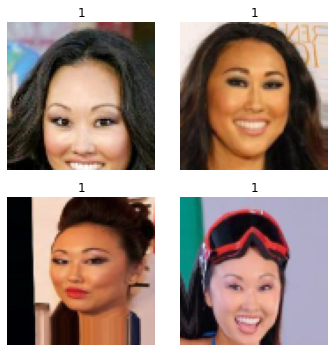

In [52]:
cid_dict[1509]

insp(cid_dict, 1509)

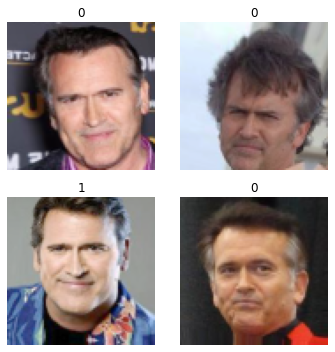

In [73]:
insp(cid_dict, 1399)

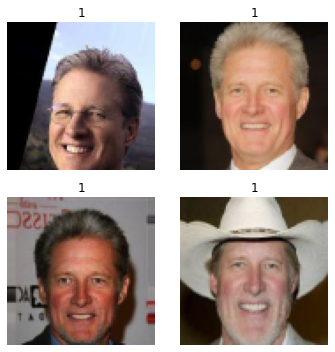

In [76]:
insp(cid_dict, 1398)

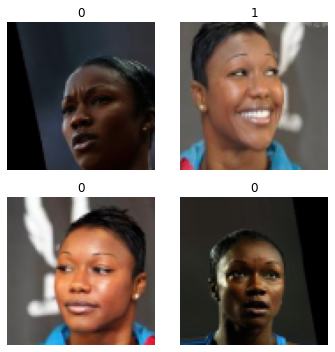

In [80]:
insp(cid_dict, 1571)

In [60]:
df[df['lvl'] == 2]

,id,acc,lvl
6,10073,0.666667,2
10,10113,0.666667,2
15,1025,0.666667,2
25,1103,0.666667,2
38,1249,0.666667,2
44,1302,0.666667,2
56,137,0.666667,2
61,1398,0.666667,2
62,1399,0.666667,2
64,1419,0.666667,2
